<a href="https://colab.research.google.com/github/SeunghyeChae/CAKD3_tmdhey/blob/main/dl_classifying0movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
imp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

from tensorflow import keras

In [ ]:
from tensorflow.keras.datasets import imdb

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
# num_words=10000 은 훈련 데이터에서 자주 나타나는 단어 10000개만 사용


In [ ]:
len(train_data[0])

218

In [ ]:
print(train_data.shape)
print(train_data[:5])

print(train_labels[0])

## 1 긍정    0 부정


(25000,)
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 

In [ ]:
import numpy as np
max(np.sort([max(sequence) for sequence in train_data]))

9999

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1.          # 부동소수
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 31ms/step - loss: 0.4947 - accuracy: 0.7840 - val_loss: 0.3999 - val_accuracy: 0.8345
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2836 - accuracy: 0.9033 - val_loss: 0.3213 - val_accuracy: 0.8731
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2088 - accuracy: 0.9306 - val_loss: 0.2773 - val_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1654 - accuracy: 0.9467 - val_loss: 0.2772 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1372 - accuracy: 0.9548 - val_loss: 0.2948 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1081 - accuracy: 0.9681 - val_loss: 0.3413 - val_accuracy: 0.8719
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0934 - accuracy: 0.9731 - val_loss: 0.3297 - val_accuracy: 0.8810
Epoch 8/20
30

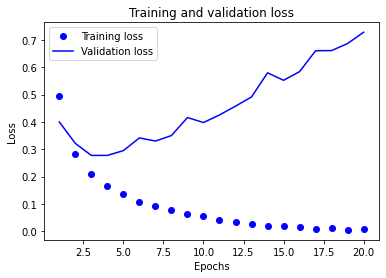

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']

val_loss=history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs, loss, 'bo',label = 'Training loss')
plt.plot(epochs, val_loss,'b',label = 'Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

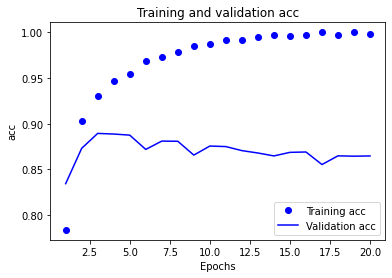

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo',label = 'Training acc')
plt.plot(epochs, val_acc,'b',label = 'Validation acc')

plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend(loc='best')

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics= ['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4365 - accuracy: 0.8198
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2502 - accuracy: 0.9107
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1946 - accuracy: 0.9298
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3208 - accuracy: 0.8761


In [ ]:
results

[0.32077452540397644, 0.8761199712753296]

In [ ]:
model.predict(x_test)

array([[0.13574722],
       [0.99877447],
       [0.685223  ],
       ...,
       [0.062841  ],
       [0.03532557],
       [0.5861457 ]], dtype=float32)